# Кластеризация. Домашнее задание

In [50]:
# Подклюим необходимые библиотеки
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore')

In [51]:
# Загружаем датасет
data = pd.read_excel('geo.xlsx')
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [52]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

Отмасштабираем данные

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
X_scaled = scaler.fit_transform(data[['x','y']])

Сделаем кластеризацию с параметрами по умолчанию

In [56]:
from sklearn.cluster import DBSCAN, KMeans

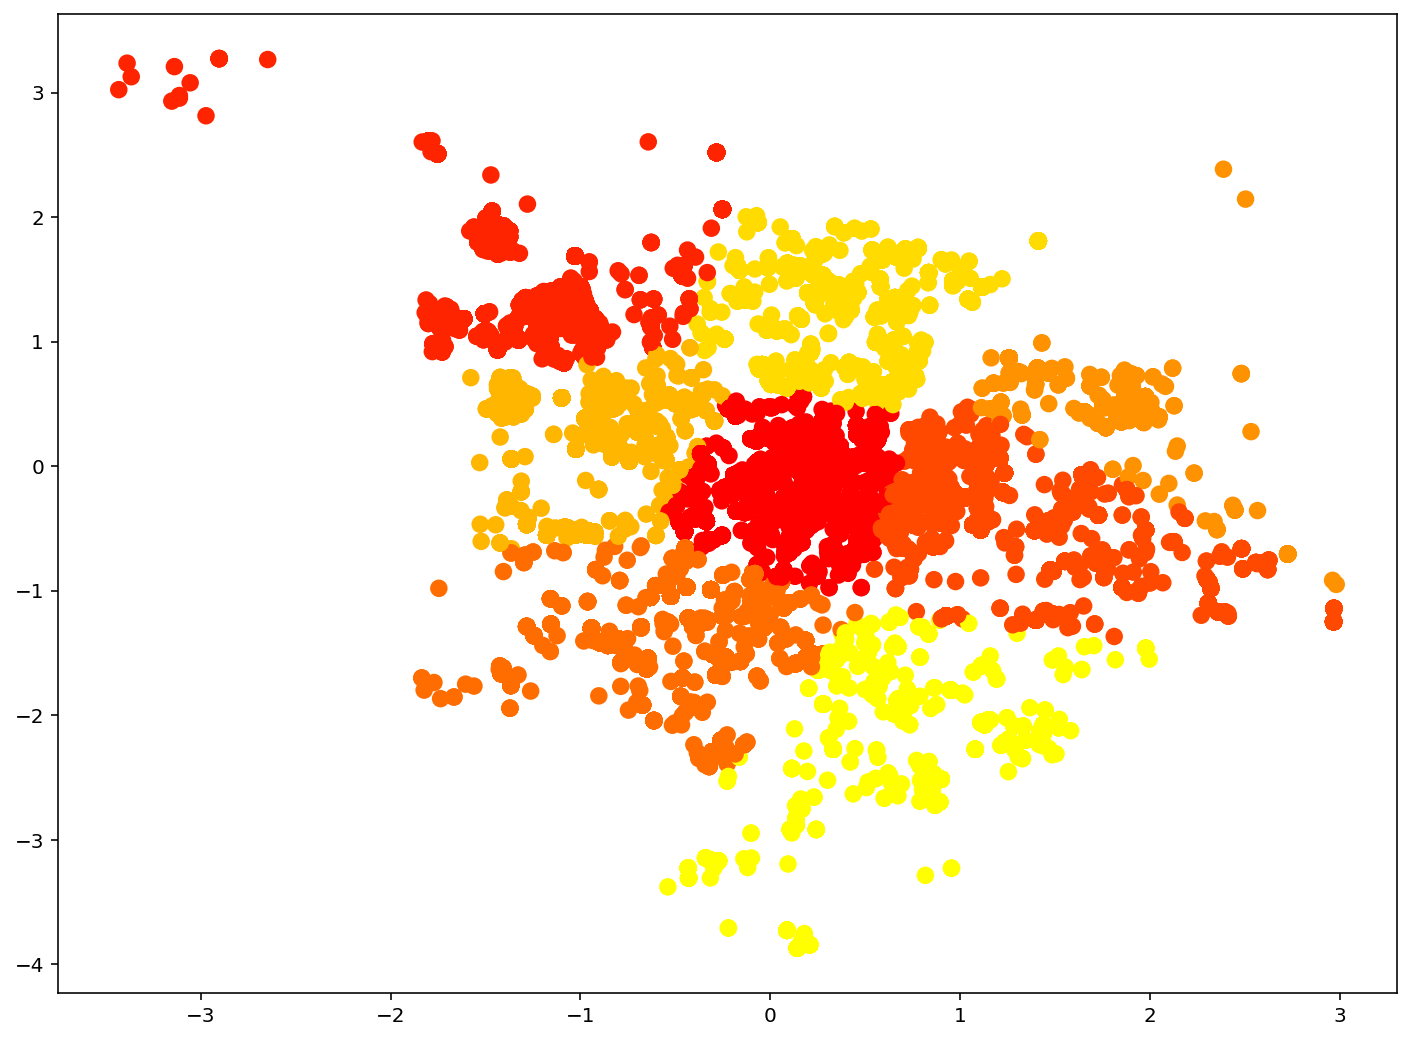

In [57]:
kmn = KMeans()
clusters = kmn.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60)


На мой взгляд - слишком много кластеров получилось: 8

Проанализируем и попробуем найти оптимальное количество кластеров

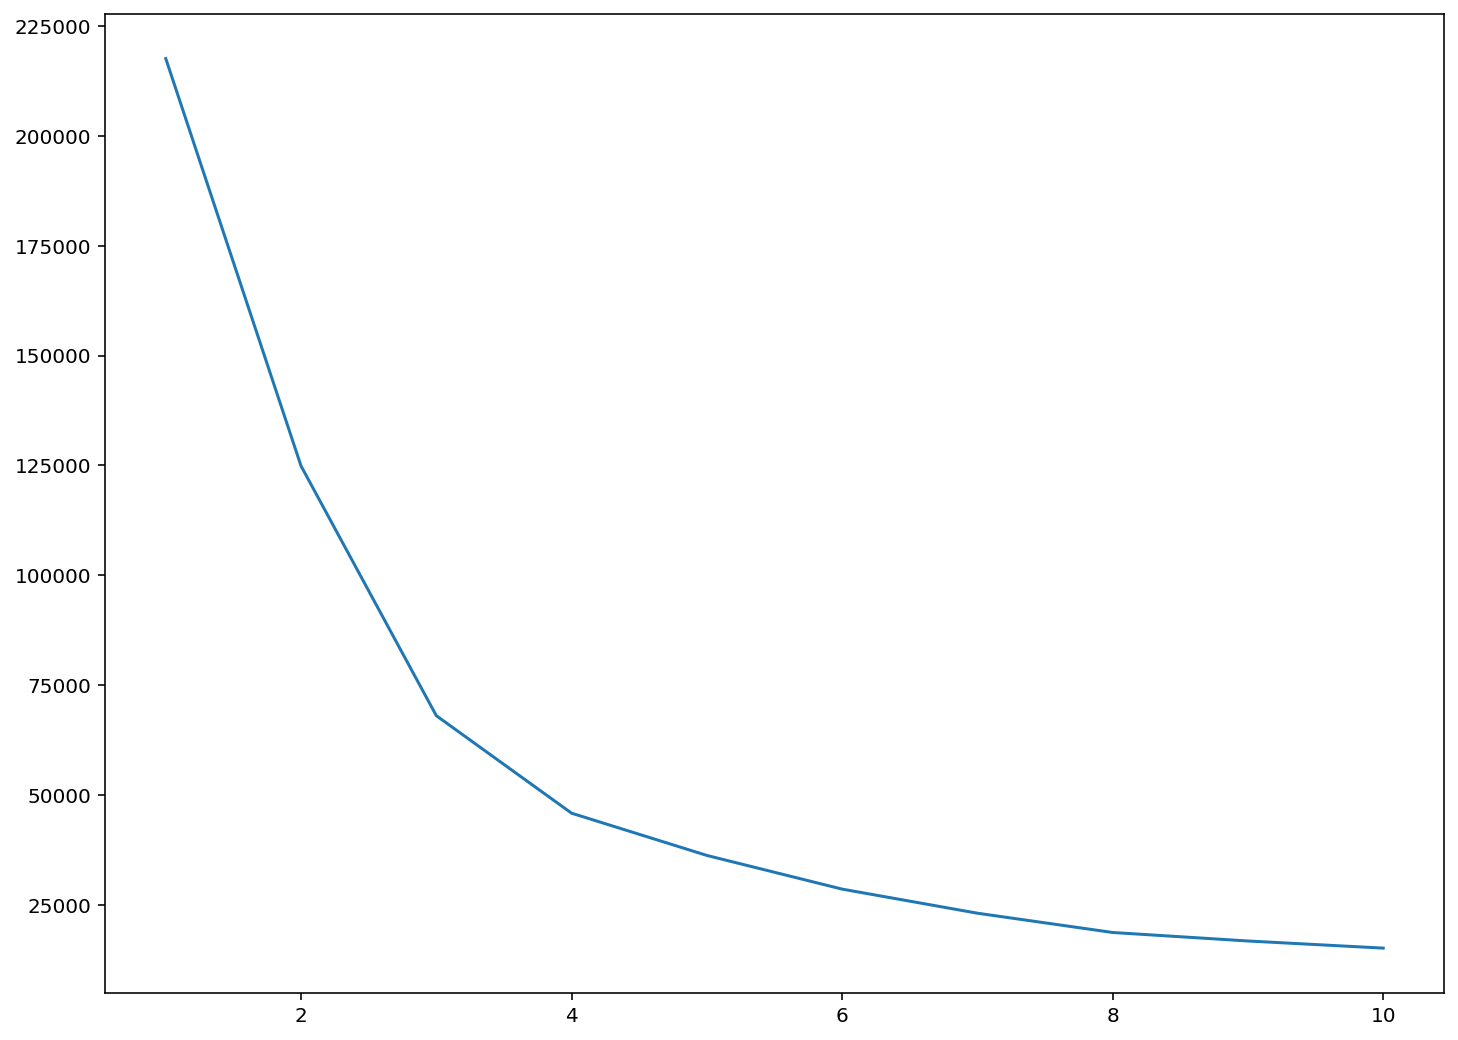

In [58]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)

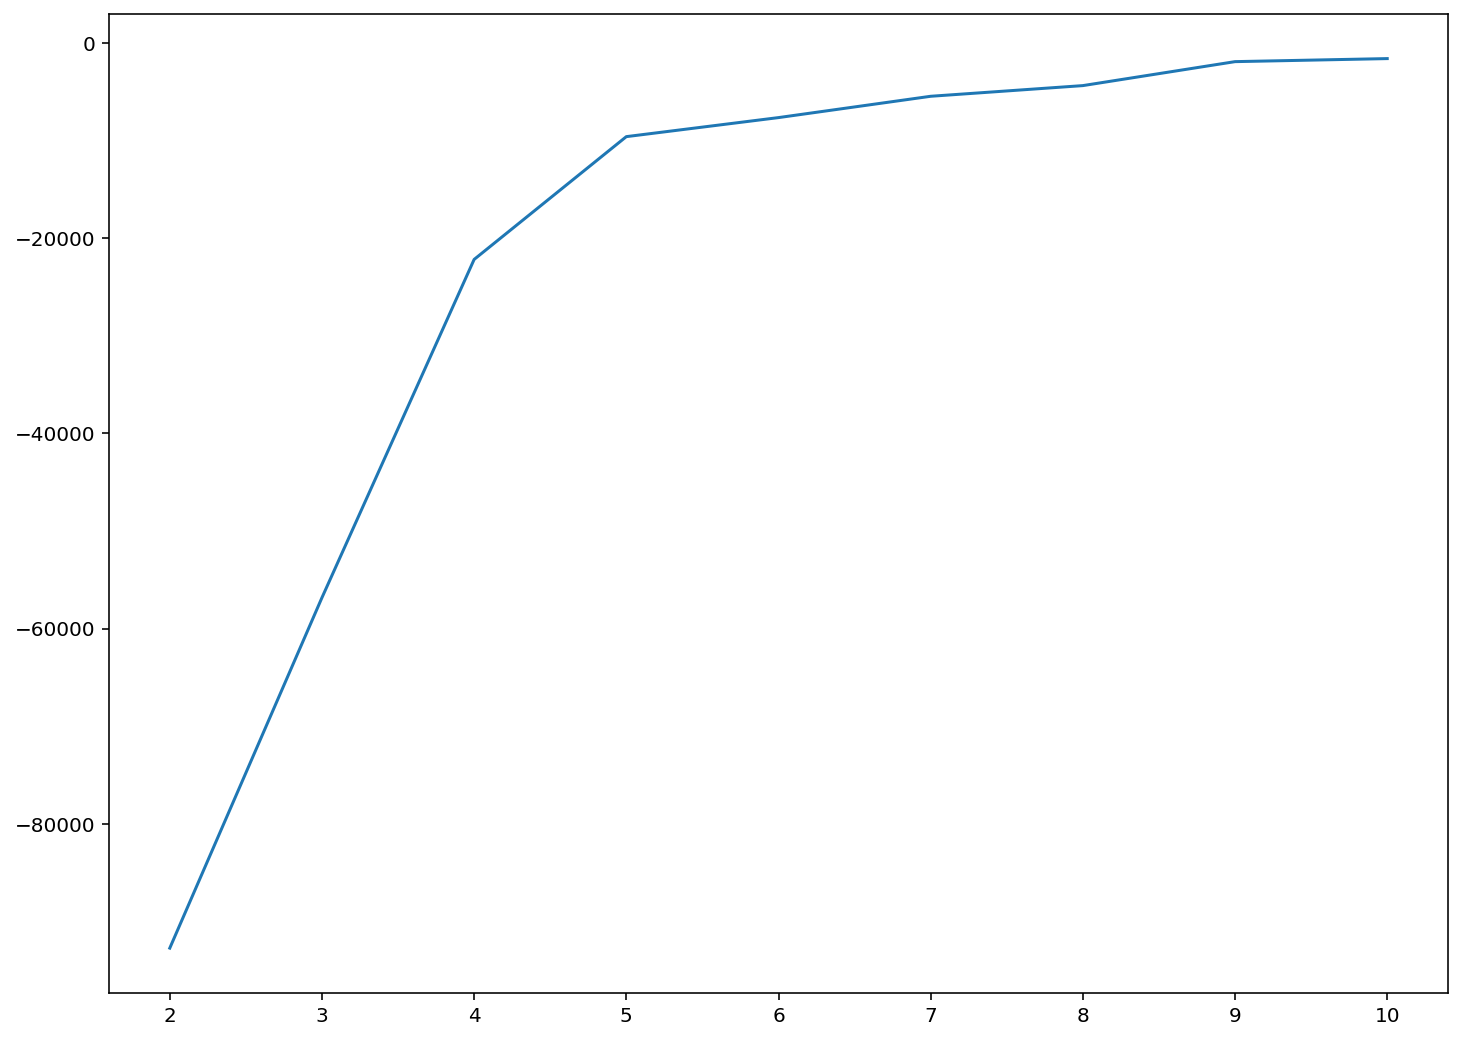

In [59]:
diff = np.diff(k_inertia)

plt.plot(ks[1:], diff)

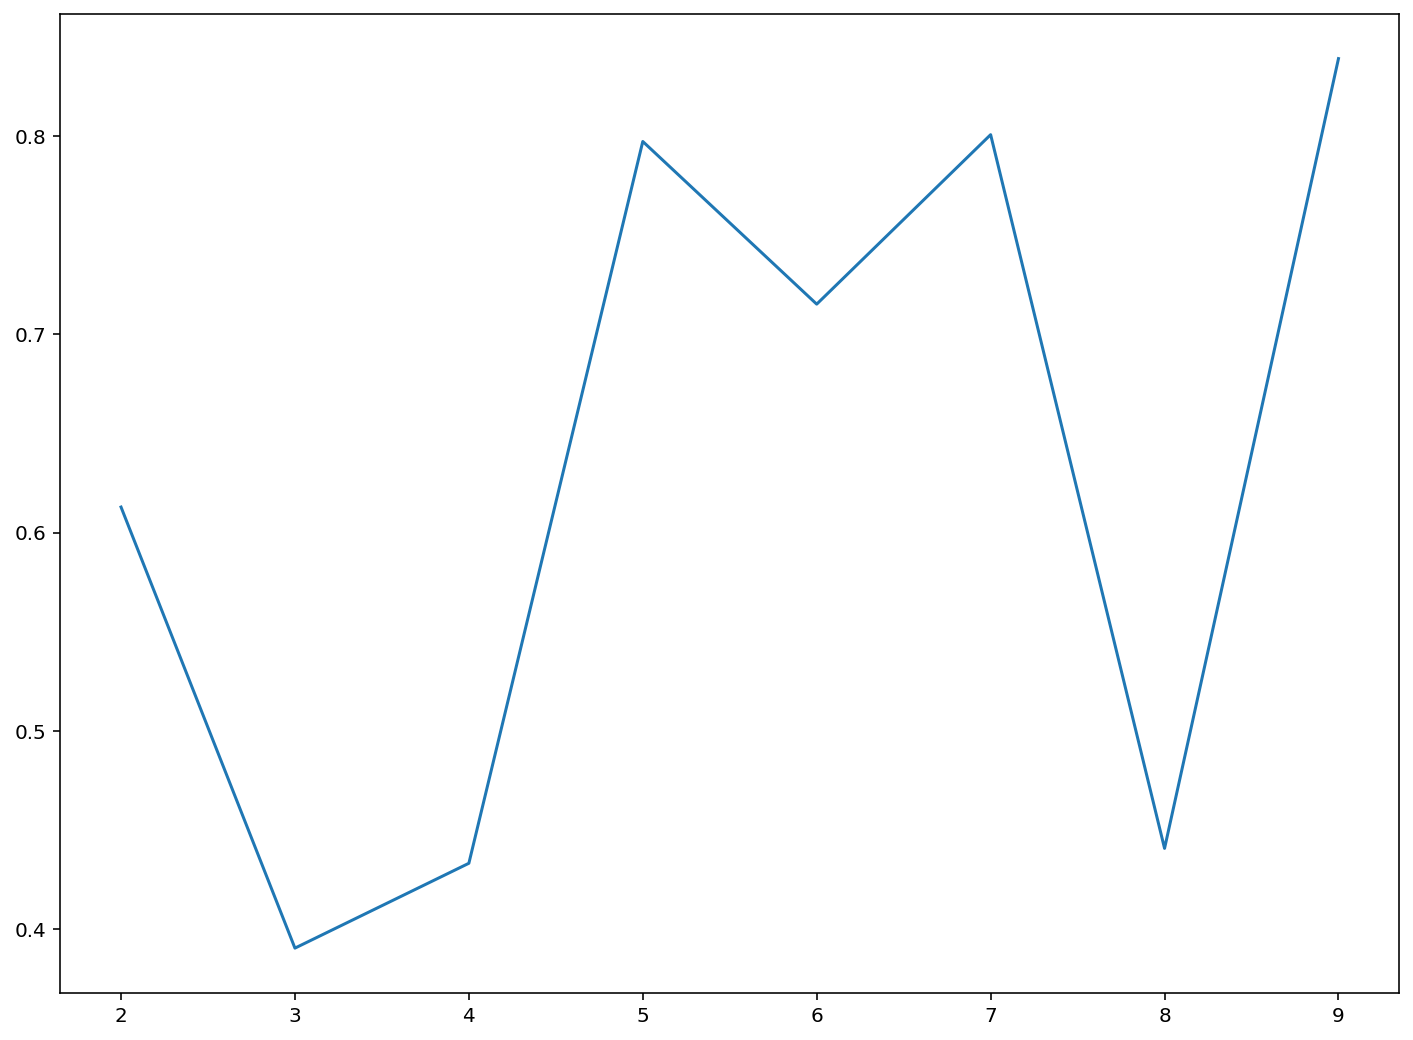

In [60]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [62]:
k_opt = ks[np.argmin(diff_r)+1]
print("Оптимальное количество кластеров", k_opt)

Оптимальное количество кластеров 3


Сделаем кластеризацию по 3 группам

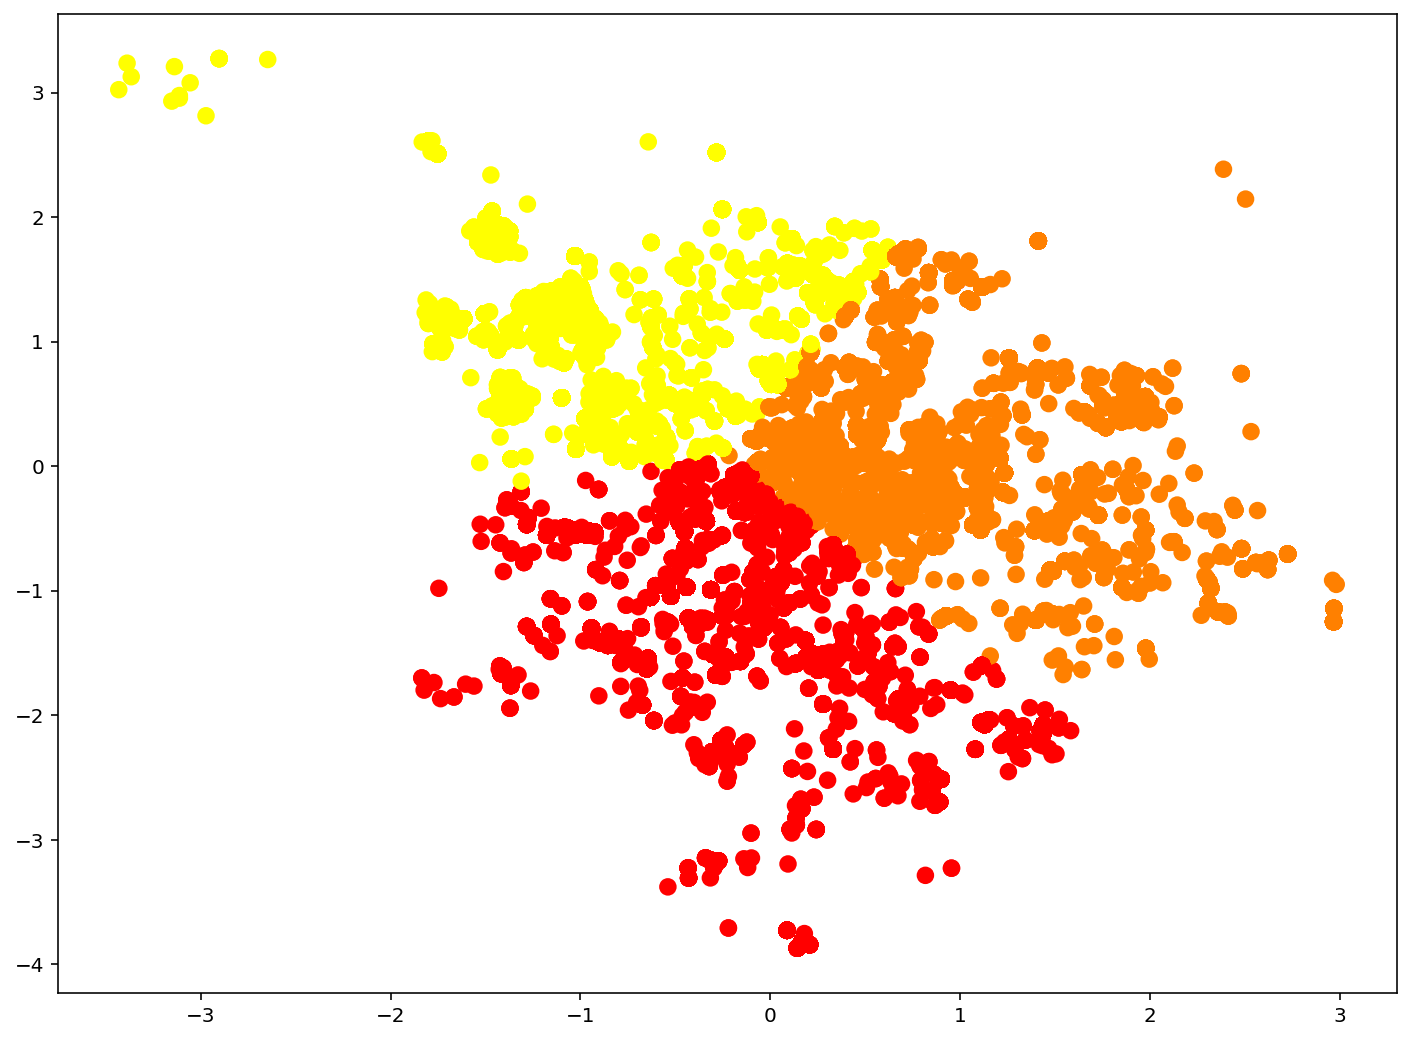

In [63]:
kmeans_clust = KMeans(n_clusters=3)
clusters = kmeans_clust.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60)

Аналогичное проделаем для голосов "ЗА"

In [64]:
X_scaled_positive = scaler.fit_transform(data.loc[data['comment_class'] == 1][['x','y']])

Найдем оптимальное количество кластеров

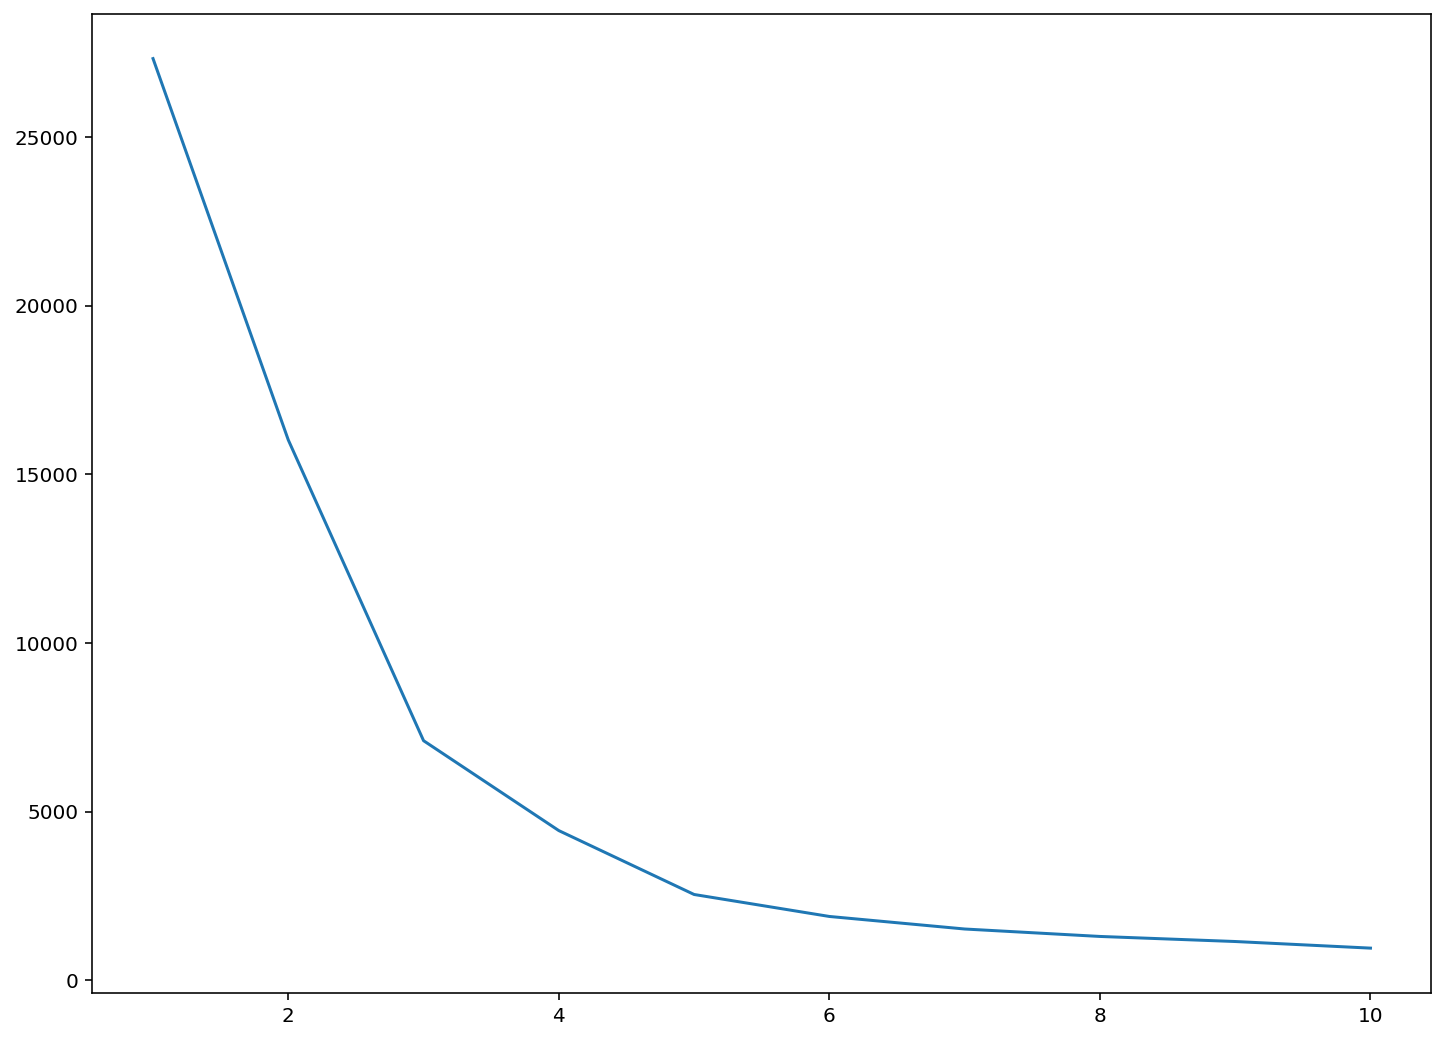

In [65]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled_positive, )
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)

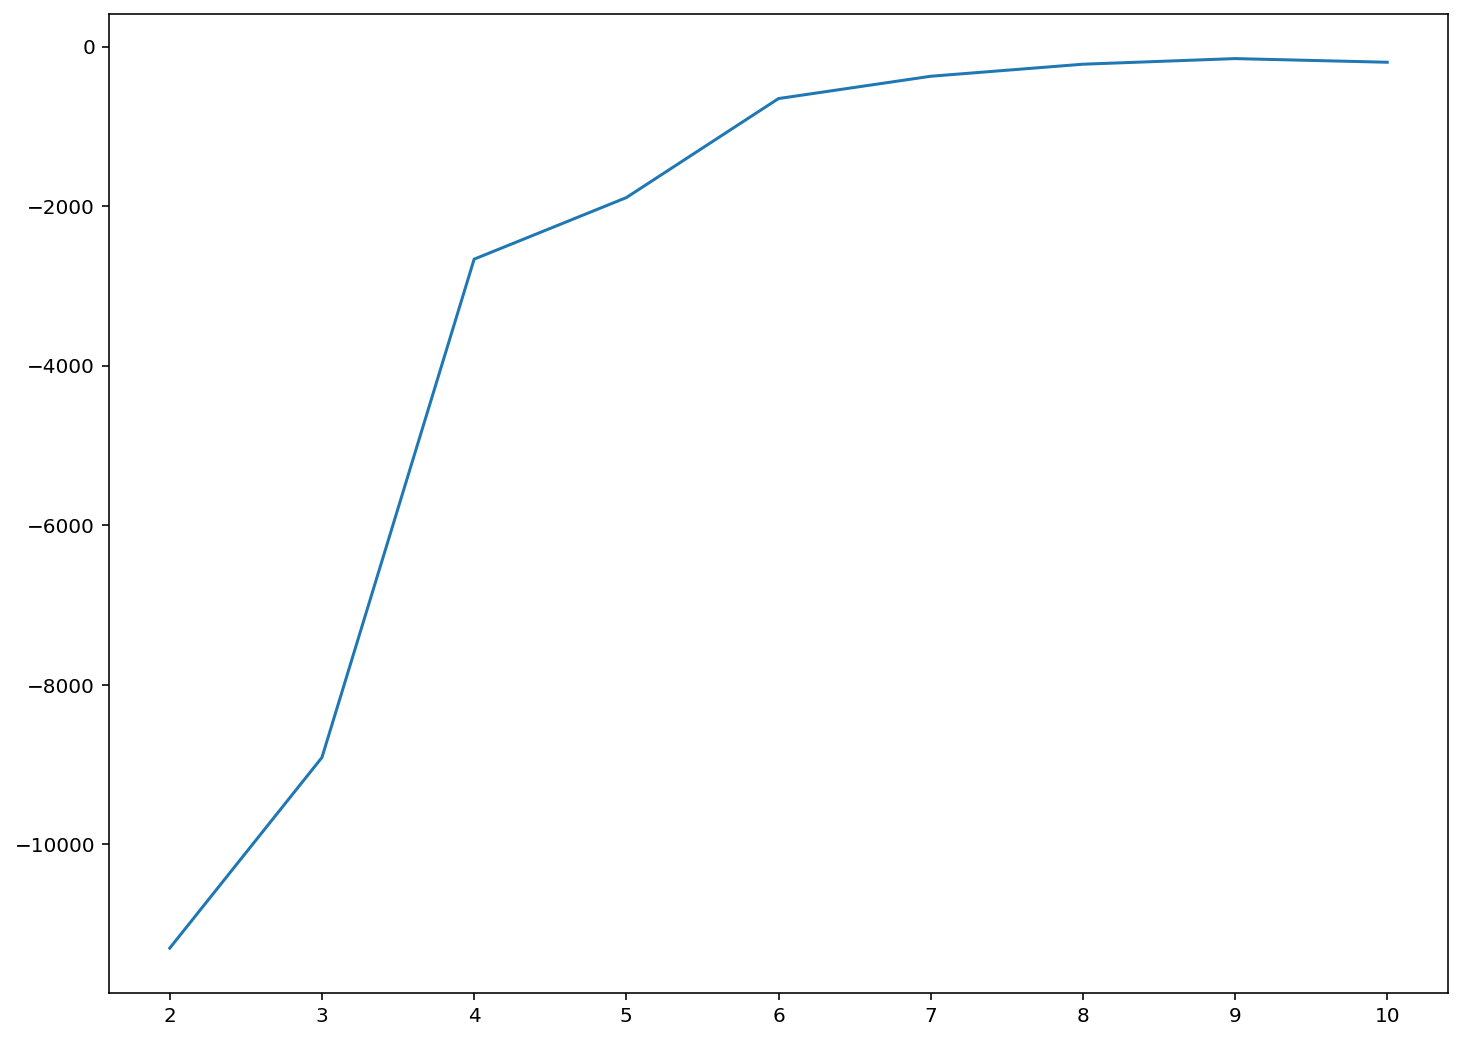

In [66]:
diff = np.diff(k_inertia)

plt.plot(ks[1:], diff)

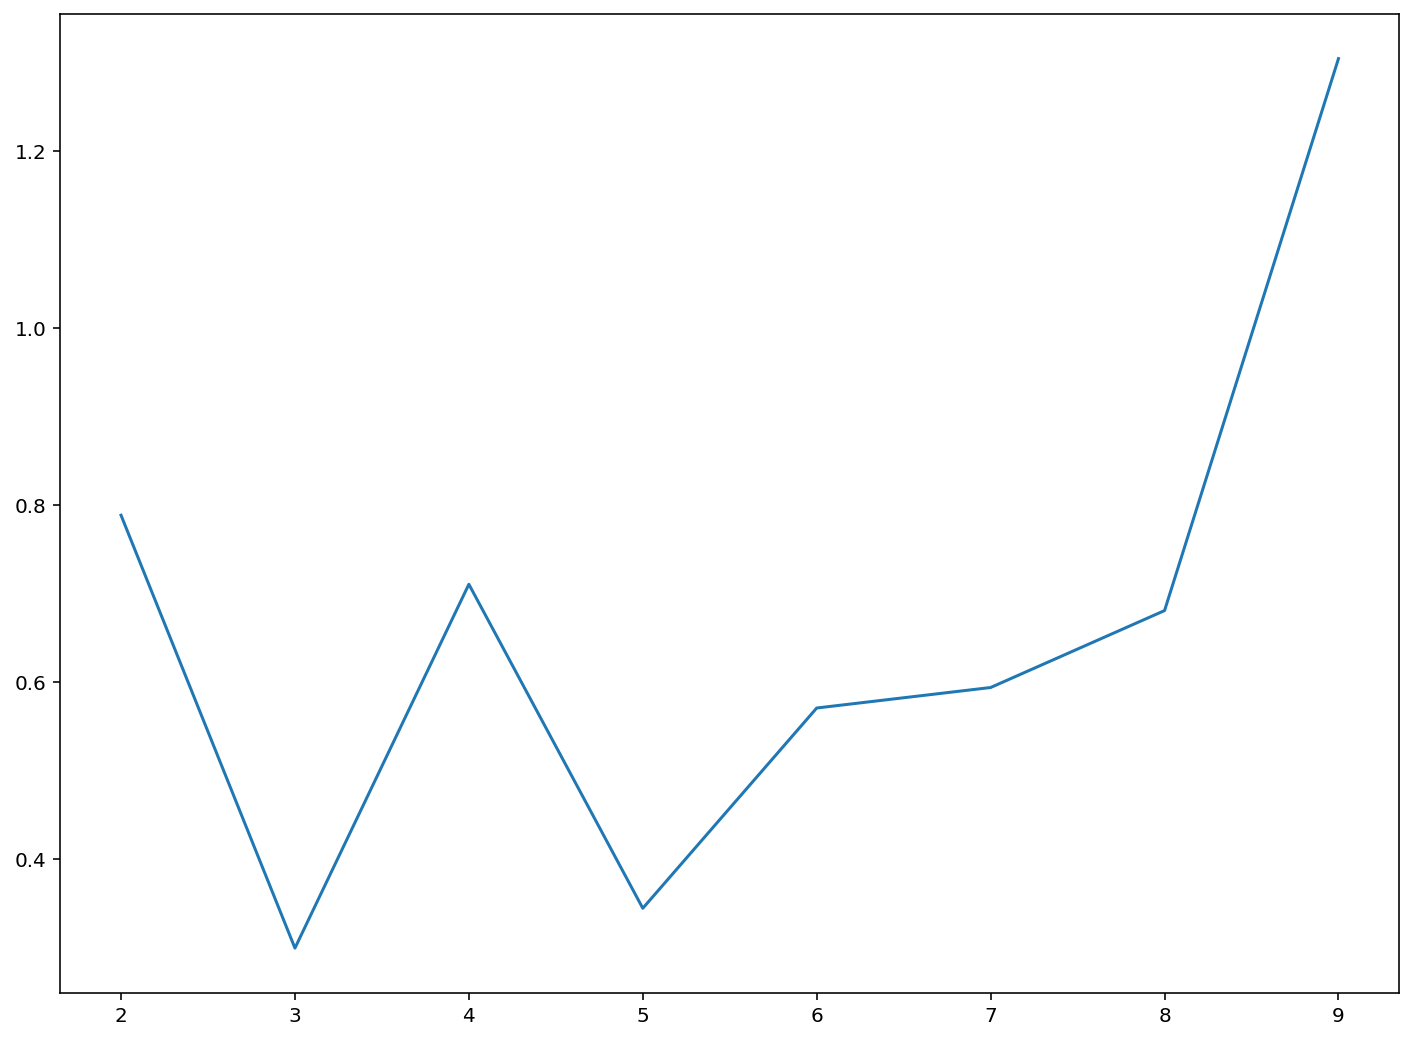

In [67]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [68]:
k_opt = ks[np.argmin(diff_r)+1]
print("Оптимальное количество кластеров", k_opt)

Оптимальное количество кластеров 3


Оптимальное количество кластеров такое же - 3. Сделаем кластеризацию на 3 кластера

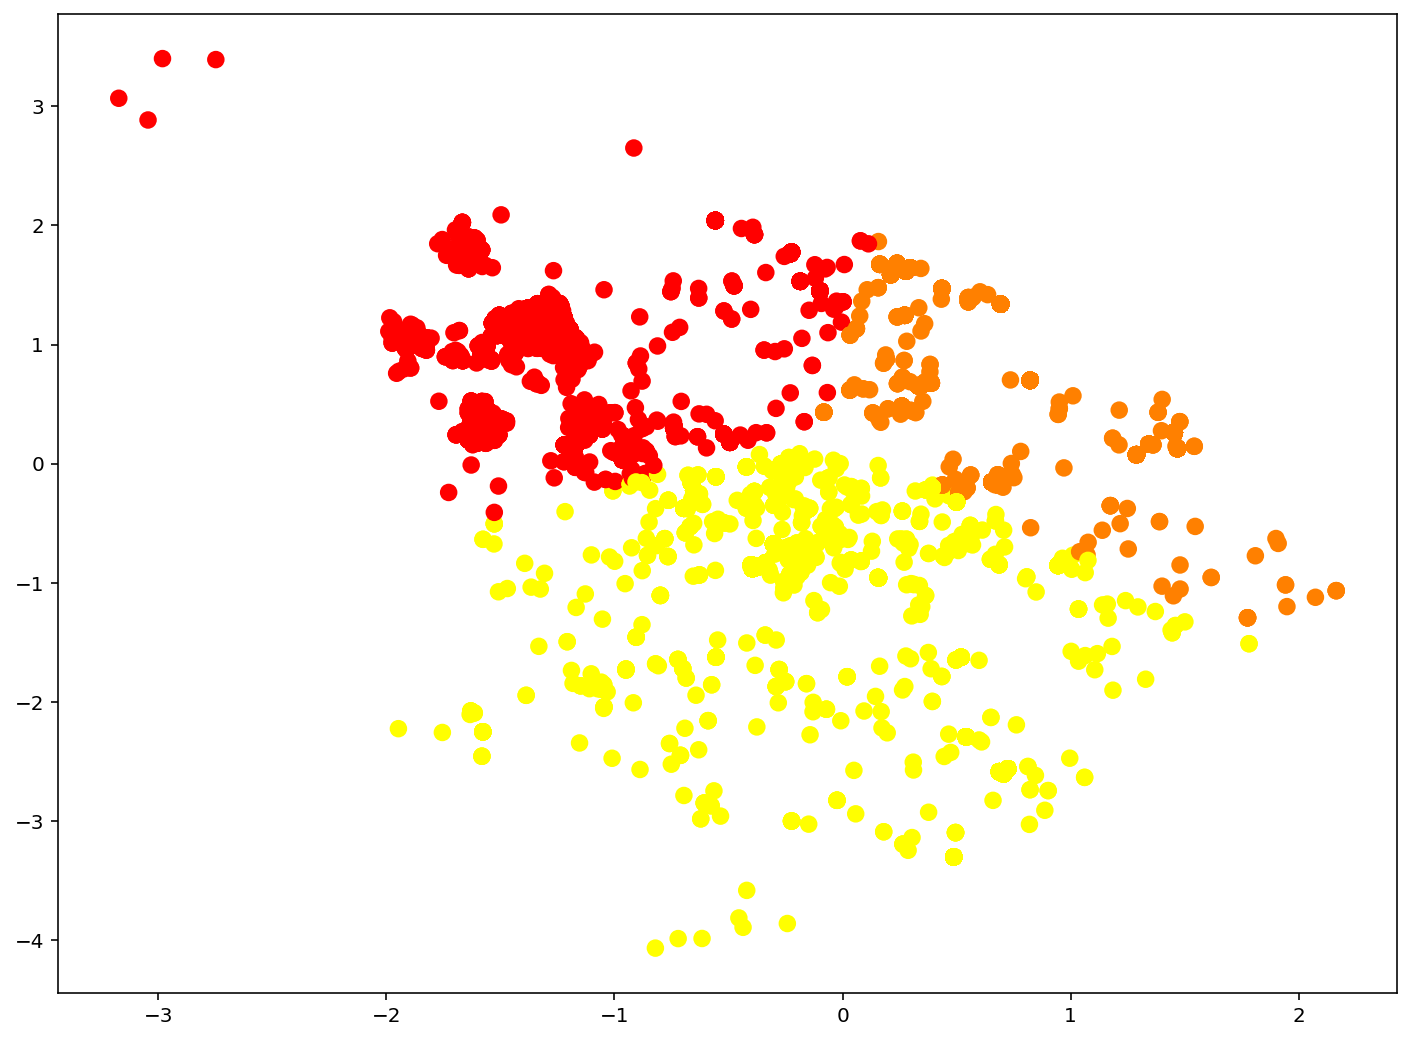

In [69]:
kmeans_clust = KMeans(n_clusters=3)
clusters = kmeans_clust.fit_predict(X_scaled_positive)
plt.scatter(X_scaled_positive[:, 0], X_scaled_positive[:, 1], c=clusters, cmap='autumn', s=60)

Исследуем голоса "Против"

In [70]:
X_scaled_negative = scaler.fit_transform(data.loc[data['comment_class'] == -1][['x','y']])

Также найдем оптимальное количество кластеров. Для сравнения с другими выборками

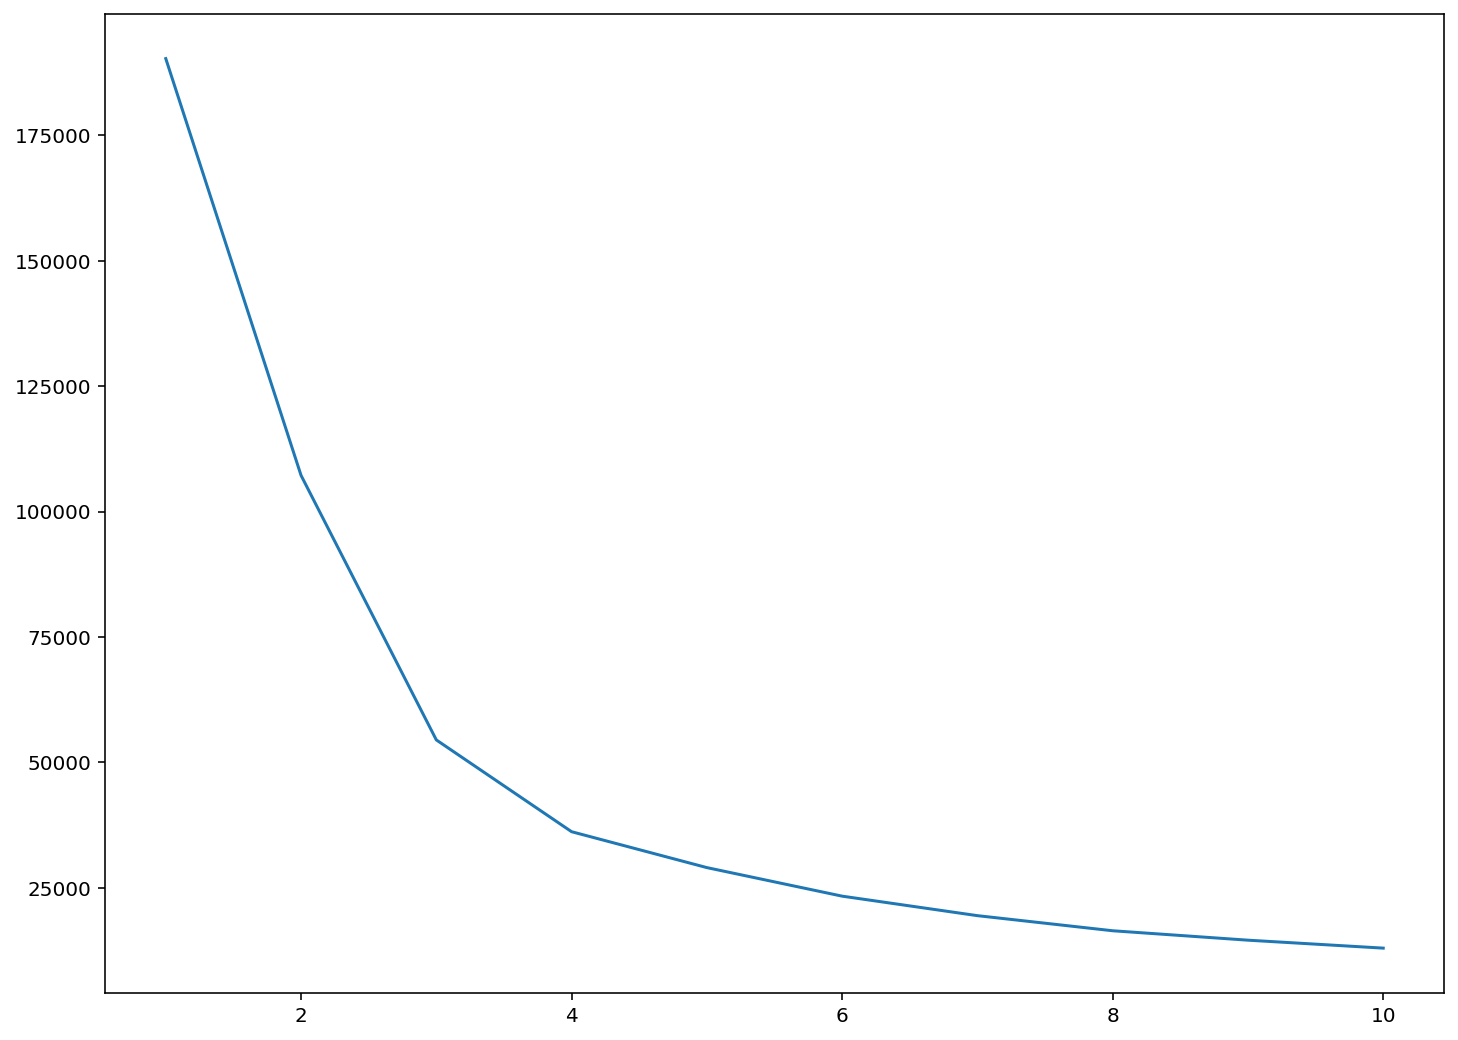

In [71]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled_negative, )
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)

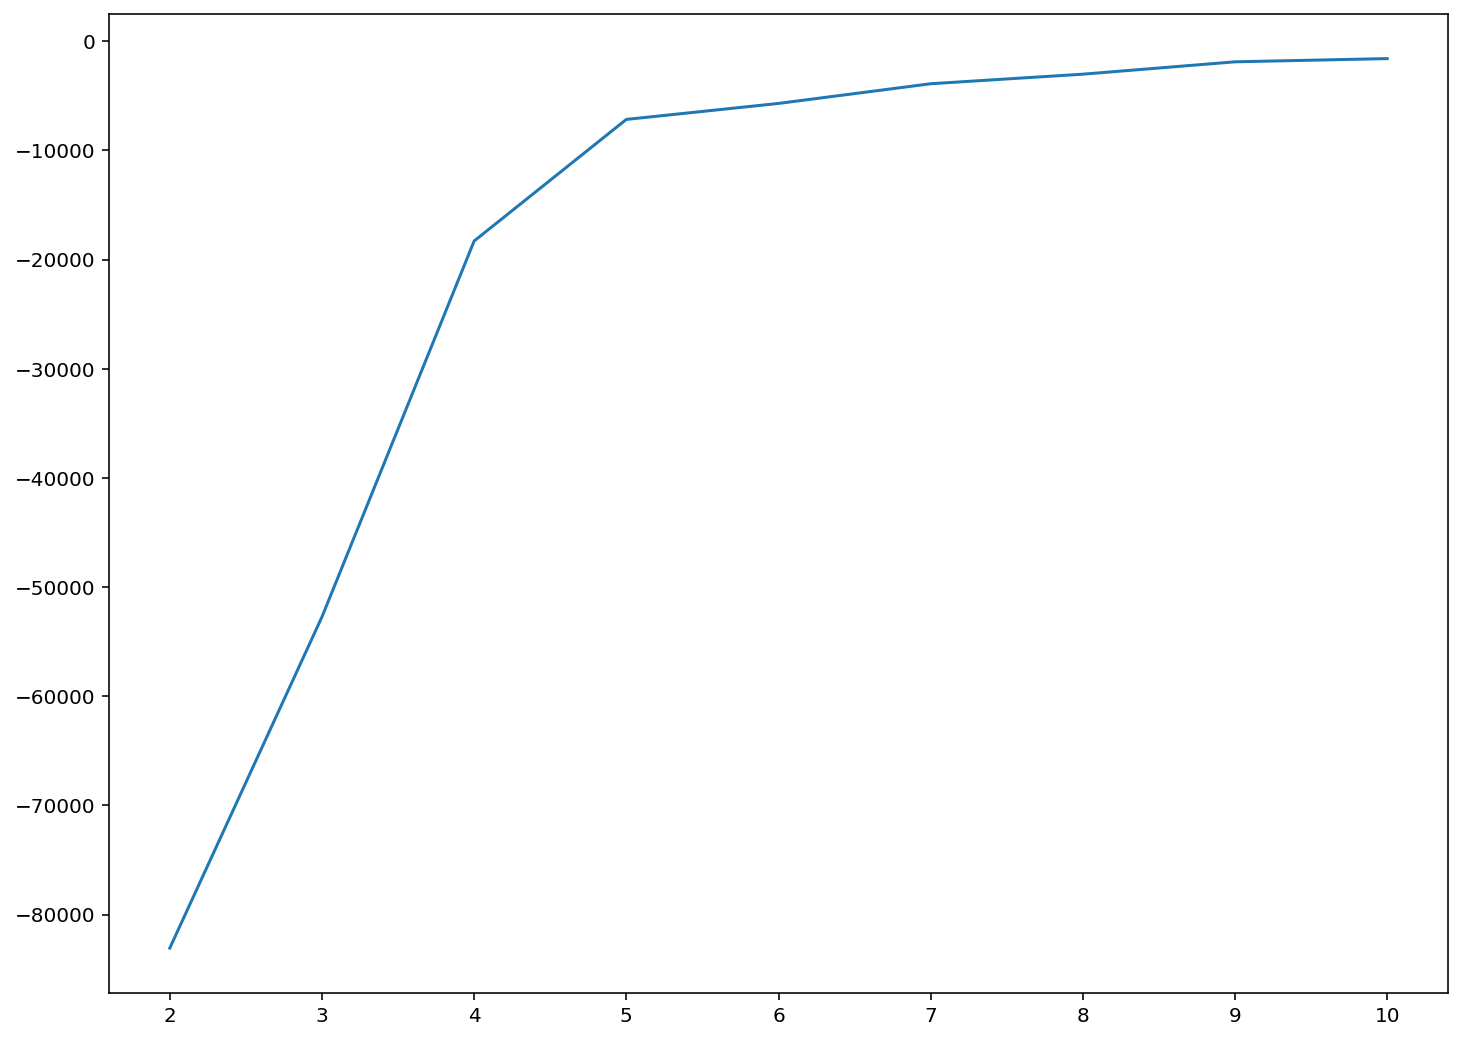

In [72]:
diff = np.diff(k_inertia)

plt.plot(ks[1:], diff)

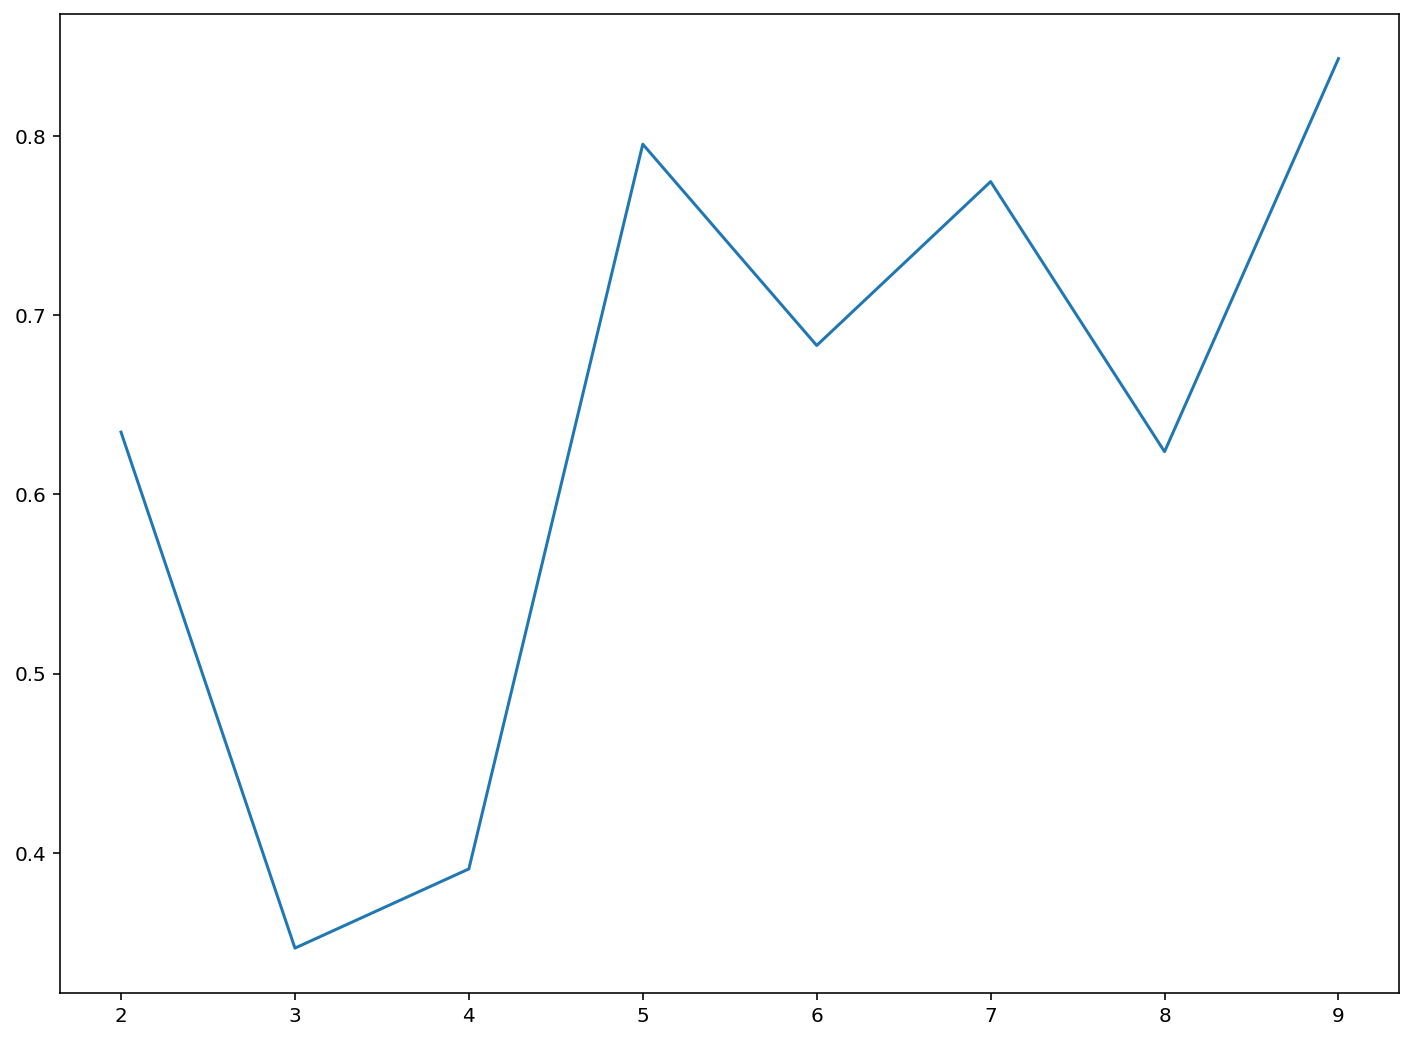

In [73]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [74]:
k_opt = ks[np.argmin(diff_r)+1]
print("Оптимальное количество кластеров", k_opt)

Оптимальное количество кластеров 3


Количество кластеров также 3. Сделаем кластеризацию на 3 кластера

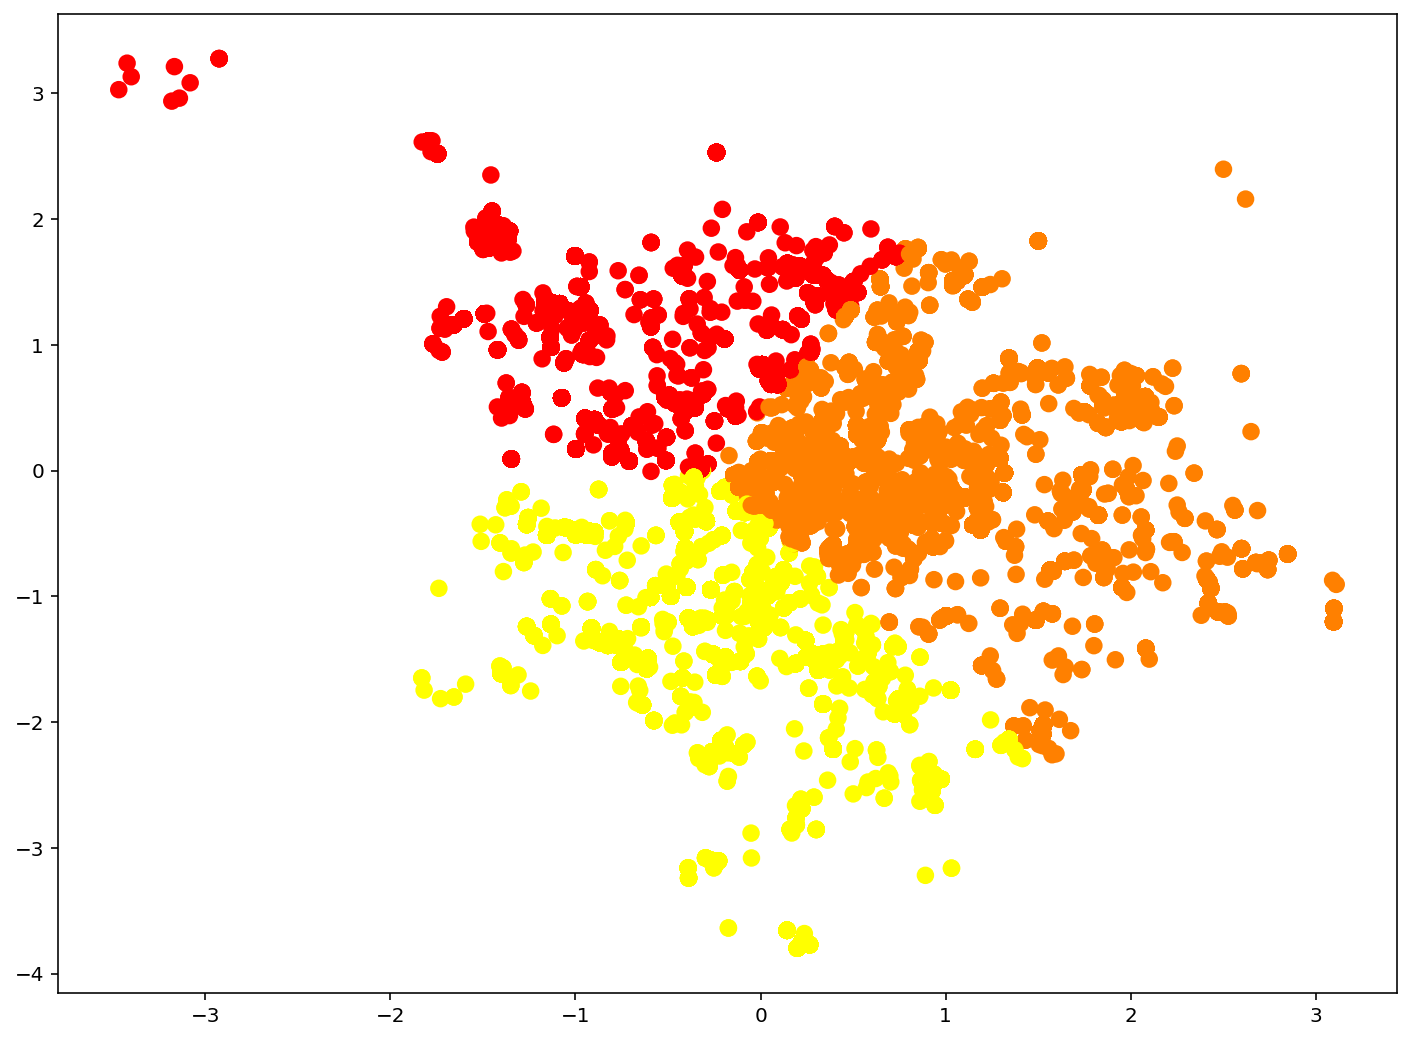

In [75]:
kmeans_clust = KMeans(n_clusters=3)
clusters = kmeans_clust.fit_predict(X_scaled_negative)
plt.scatter(X_scaled_negative[:, 0], X_scaled_negative[:, 1], c=clusters, cmap='autumn', s=60)

Попробуем найти самые плотные в голосовании районы. Указано было использовать DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом. Но несильно понял из этого. Модель построил, кластеры подсветил цветом. По скоплению точек можно определить какие районы самые плотные в голосовании. Но не совсем понял - это ли требовалось.

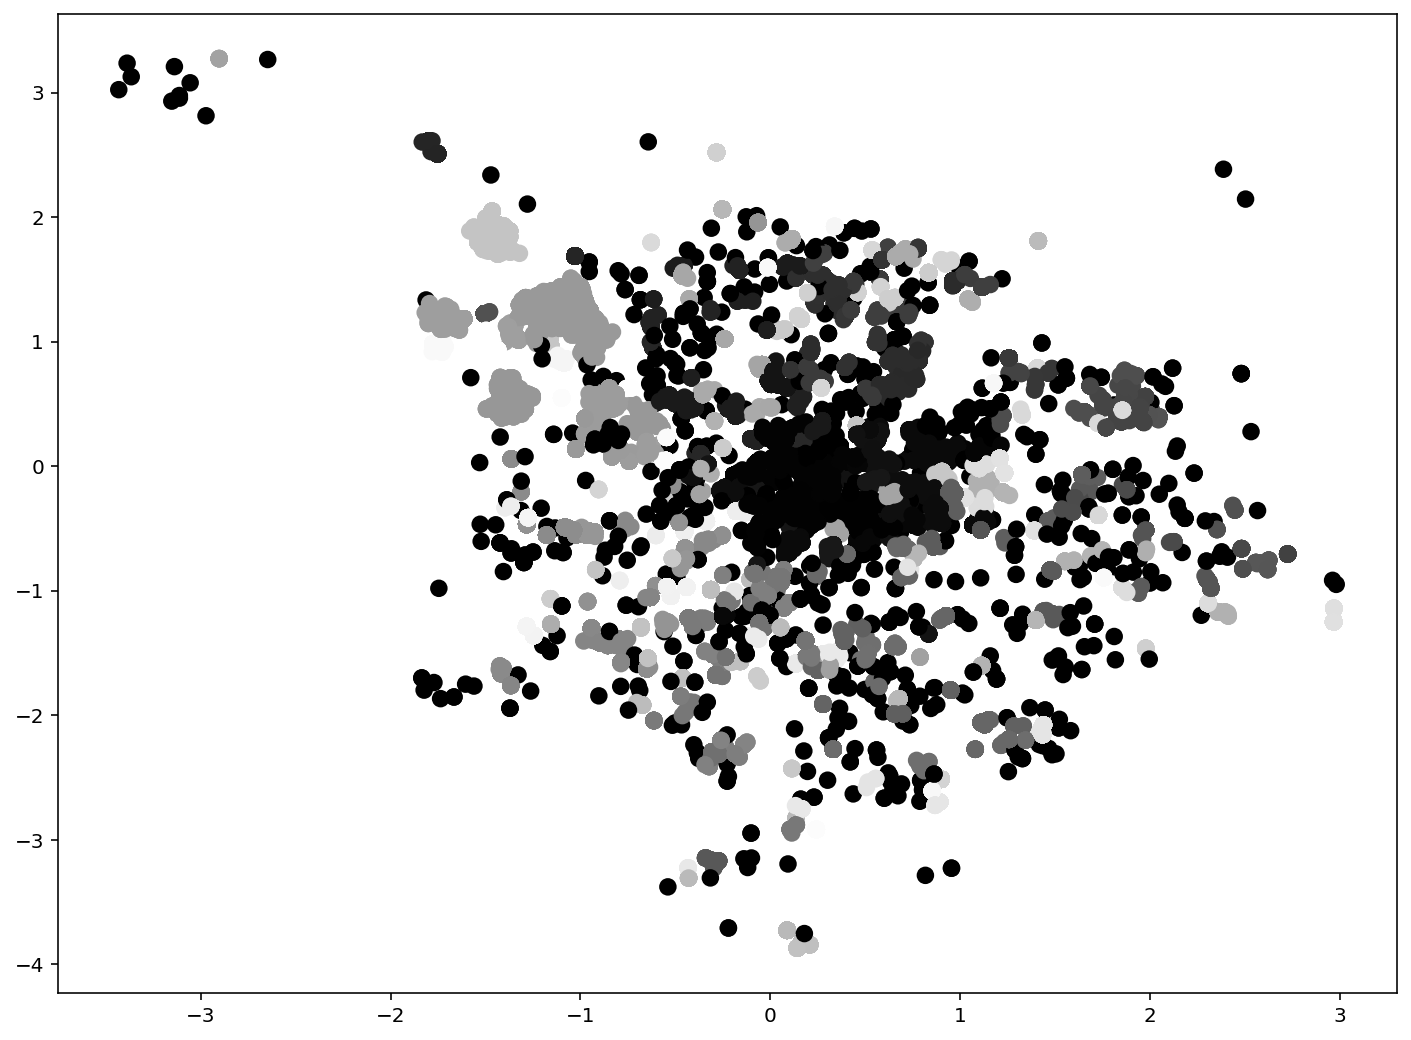

In [25]:
dbs_clust = DBSCAN(eps=0.05)
clusters = dbs_clust.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='gray', s=60)

Попробуем найти самые основные тематики комментариев.\
Как я понял, комментарии нужно векторизовать, кластеризовать и добавить номера кластеров, чтобы определить комментарии одной тематики.\
Попробуем так и сделать. Для векторизации используем TF-IDF

In [26]:
# Загрузим данные
comment_data = pd.read_excel('geo_comment.xlsx')
comment_data.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [27]:
# Сделаем векторное представление
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comment_data['comment'])


Найдем оптимальное количество тем - кластеров

Итерация  1
Итерация  2
Итерация  3
Итерация  4
Итерация  5
Итерация  6
Итерация  7
Итерация  8
Итерация  9
Итерация  10


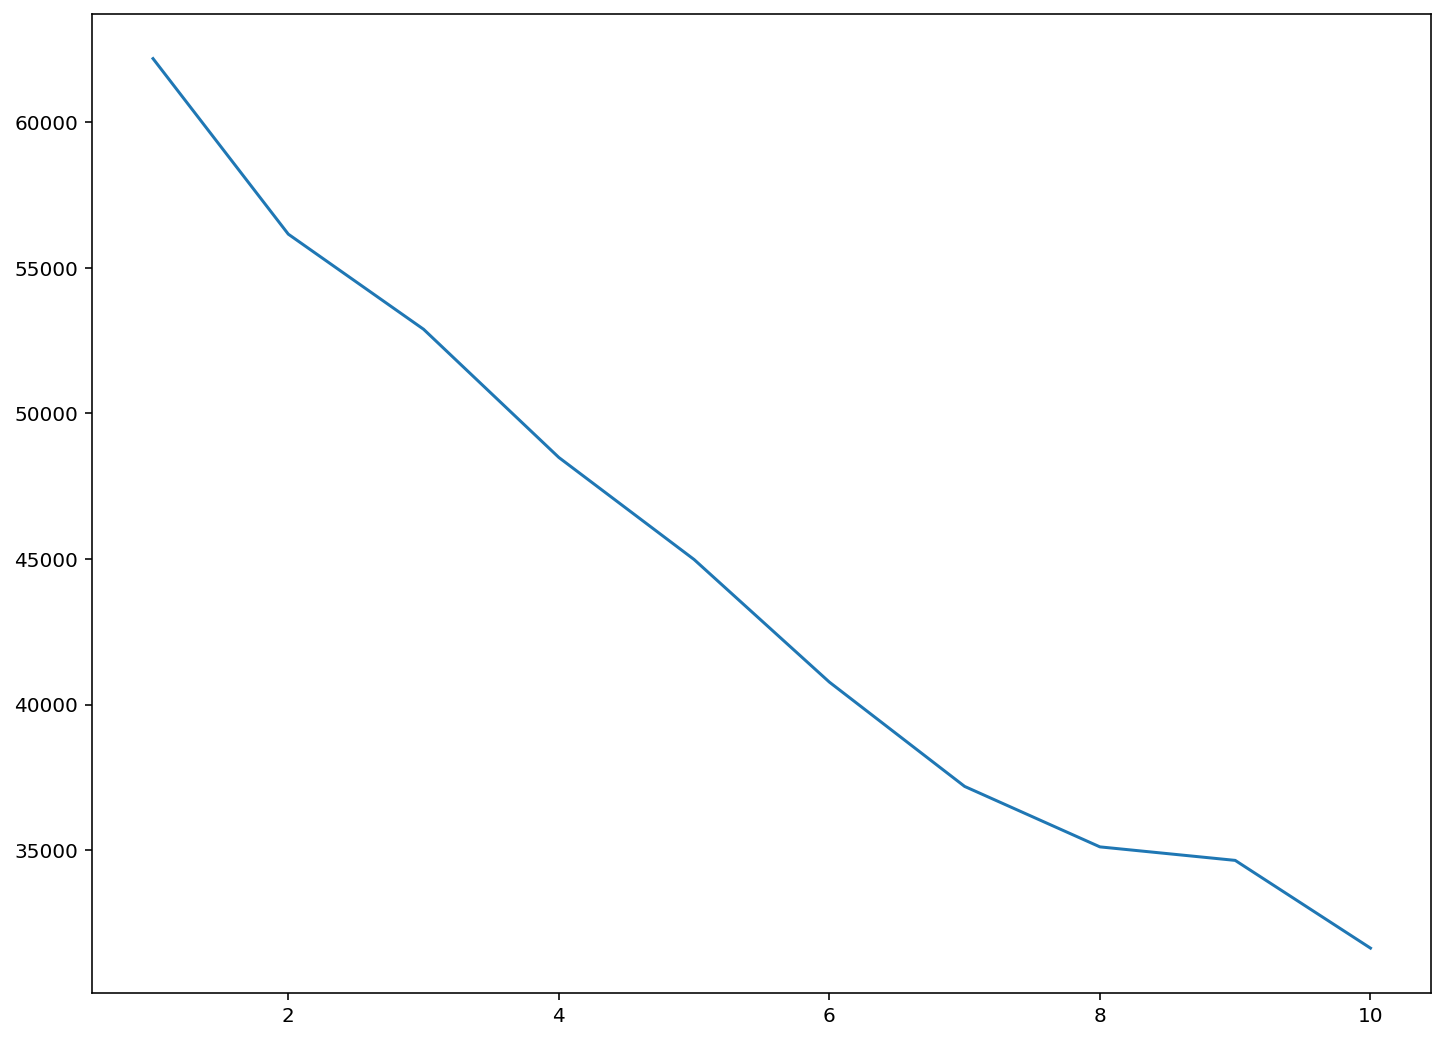

In [28]:
k_inertia = []
ks = range(1,11)
i = 1

for k in ks:
    print("Итерация", i)
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X, )
    k_inertia.append(clf_kmeans.inertia_)
    i += 1
    
plt.plot(ks, k_inertia)

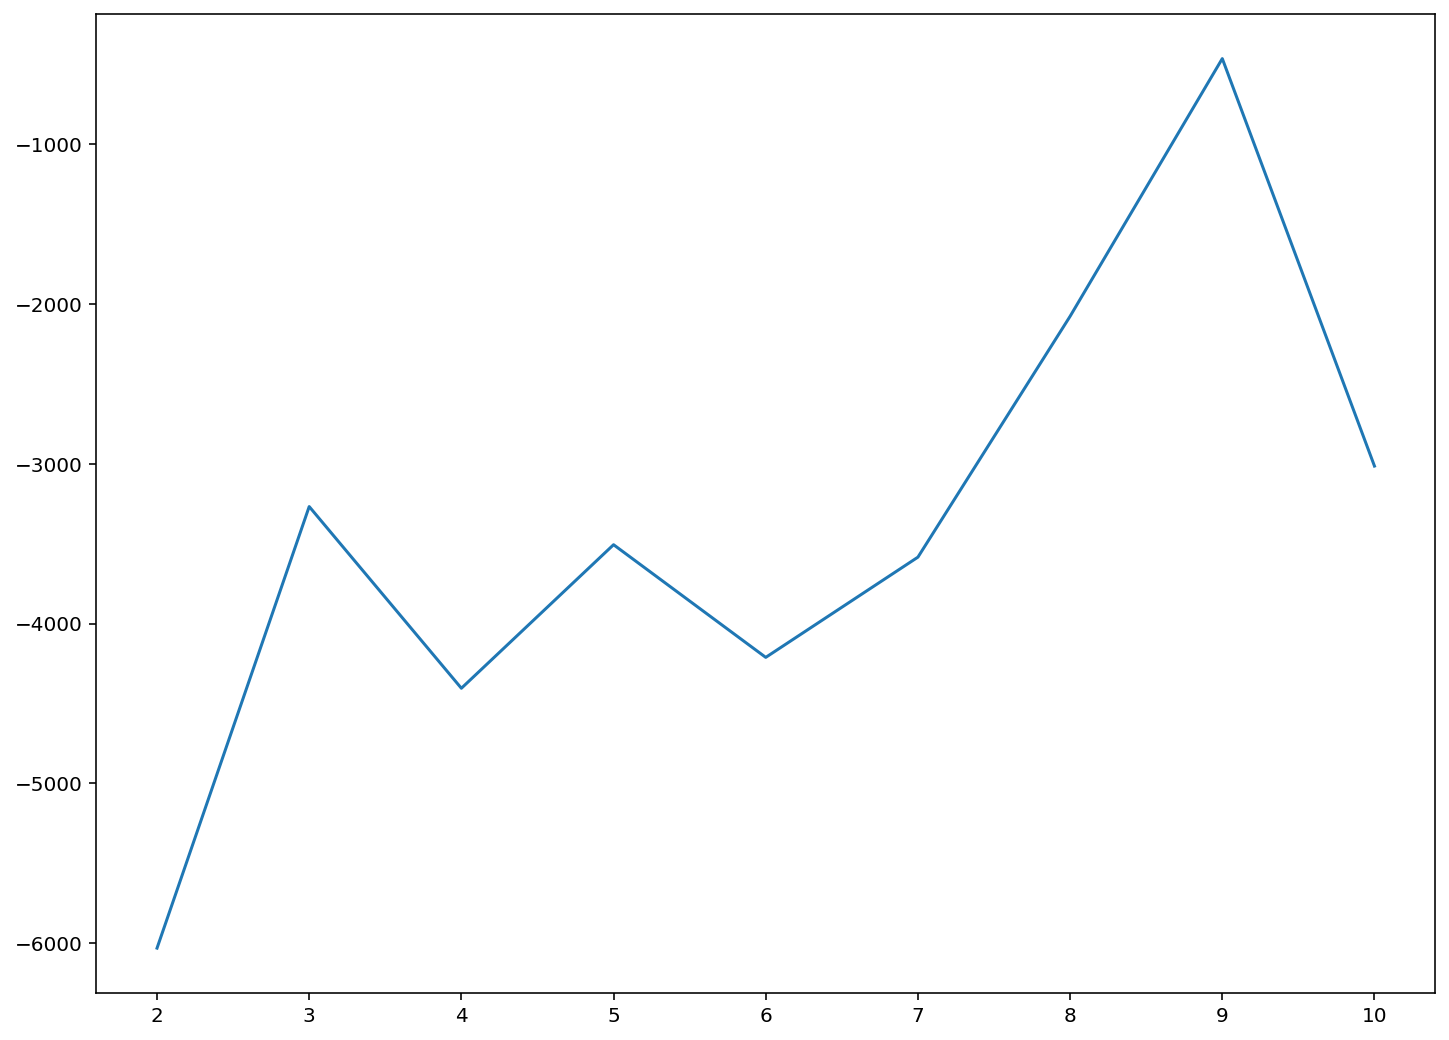

In [29]:
diff = np.diff(k_inertia)

plt.plot(ks[1:], diff)

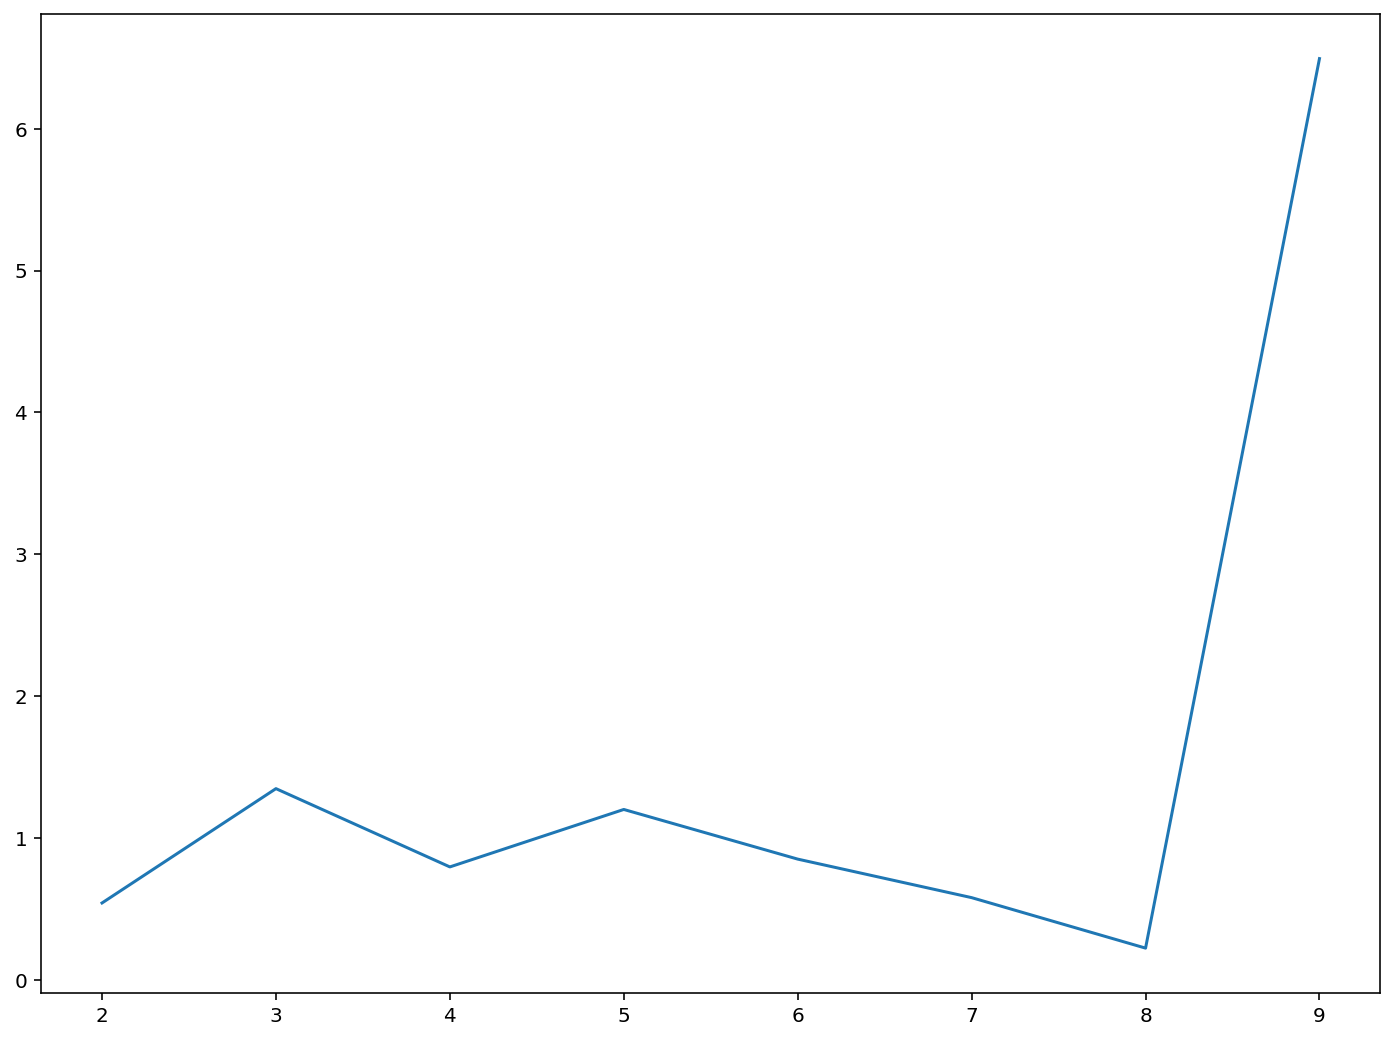

In [30]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [31]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

8

Оптимальное количество кластеров - тем: 8

Кластеризуем теперь на 8 тем и добавим стол

In [33]:
clf_kmeans = KMeans(n_clusters=8)
clusters_kmeans = clf_kmeans.fit_predict(X, )

In [39]:
clf_kmeans.labels_

array([7, 7, 7, ..., 7, 7, 7], dtype=int32)

In [36]:
comment_data['term'] = clusters_kmeans

In [48]:
comment_data

,Unnamed: 0,x,y,comment_class,multiplier,comment,term
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...,7
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...,7
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...,7
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...,7
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...,7
...,...,...,...,...,...,...,...
70377,70377,37.454528,55.792331,-1,1,Не поддерживаю. Я против строительства многоэт...,7
70378,70378,37.384325,55.899068,-1,1,Не поддерживаю. Не нужны отстойники автобусов ...,7
70379,70379,37.421066,55.848756,1,1,"Не поддерживаю. На мой взгляд, необходимо искл...",7
70380,70380,37.448509,55.793065,-1,1,Не поддерживаю: нарушения при строительстве н...,7
